# Objective:


### To do a Exploratory Data Analysis on Presidents of USA, using data from Wikipedia.

In [2]:
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Webscrape a Wikipedia Table:

source1:https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States 

In [3]:
pres = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")[1]

In [4]:
pres.head(3)

,Presidency[a],Presidency[a].1,Portrait,Name(Birth–Death),Party[b],Party[b].1,Election,Vice President
0,1,"April 30, 1789–March 4, 1797",NaN,George Washington(1732–1799),NaN,Unaffiliated,1788–89,John Adams[c]
1,1,"April 30, 1789–March 4, 1797",NaN,George Washington(1732–1799),NaN,Unaffiliated,1792,John Adams[c]
2,2,"March 4, 1797–March 4, 1801",NaN,John Adams(1735–1826),NaN,Federalist,1796,Thomas Jefferson[d]


### Drop NaN Columns

In [5]:
pres = (pres.drop(["Portrait","Party[b]"], axis=1)).drop_duplicates("Name(Birth–Death)")

In [6]:
pres.head(3)

,Presidency[a],Presidency[a].1,Name(Birth–Death),Party[b].1,Election,Vice President
0,1,"April 30, 1789–March 4, 1797",George Washington(1732–1799),Unaffiliated,1788–89,John Adams[c]
2,2,"March 4, 1797–March 4, 1801",John Adams(1735–1826),Federalist,1796,Thomas Jefferson[d]
3,3,"March 4, 1801–March 4, 1809",Thomas Jefferson(1743–1826),Democratic-Republican,1800,Aaron Burr


### Rename and re-arrange columns

In [7]:
pres1 = pres["Presidency[a].1"].str.split("–",expand=True)
pres1 = pres1.rename(columns={0: "From Date",1: "To Date"})

In [8]:
pres= pres.join(pres1)

In [9]:
pres = pres.drop("Presidency[a].1", axis=1)

In [10]:
pres = pres.rename(columns={'Presidency[a]': 'No.',"Party[b].1":"Party Name"})

In [11]:
pres.head(1)

,No.,Name(Birth–Death),Party Name,Election,Vice President,From Date,To Date
0,1,George Washington(1732–1799),Unaffiliated,1788–89,John Adams[c],"April 30, 1789","March 4, 1797"


### Remove unwanted rows & Setting till date for current President

In [12]:
pres = pres.drop(82)

In [13]:
today = date.today()
d2 = today.strftime("%B %d, %Y")
pres["To Date"].values[44]=d2

In [14]:
pres.tail(3)

,No.,Name(Birth–Death),Party Name,Election,Vice President,From Date,To Date
78,44,Barack Obama(b. 1961),Democratic,2008,Joe Biden,"January 20, 2009","January 20, 2017"
80,45,Donald Trump(b. 1946),Republican,2016,Mike Pence,"January 20, 2017","January 20, 2021"
81,46,Joe Biden(b. 1942),Democratic,2020,Kamala Harris,"January 20, 2021","January 03, 2022"


### Calculate "Days in Office" as POTUS

In [15]:
pres["From Date"] =pres["From Date"].replace(
                              ["April 4, 1841[i]","July 9, 1850[k]","September 19, 1881[p]","August 2, 1923[r]"],
                              ["April 4, 1841","July 9, 1850","September 19, 1881","August 2, 1923"])

In [16]:
t1= pres["To Date"].apply(pd.to_datetime)
t2= pres["From Date"].apply(pd.to_datetime)
pres["Days in Office"]=t1-t2

In [17]:
pres.head(5)

,No.,Name(Birth–Death),Party Name,Election,Vice President,From Date,To Date,Days in Office
0,1,George Washington(1732–1799),Unaffiliated,1788–89,John Adams[c],"April 30, 1789","March 4, 1797",2865 days
2,2,John Adams(1735–1826),Federalist,1796,Thomas Jefferson[d],"March 4, 1797","March 4, 1801",1460 days
3,3,Thomas Jefferson(1743–1826),Democratic-Republican,1800,Aaron Burr,"March 4, 1801","March 4, 1809",2922 days
5,4,James Madison(1751–1836),Democratic-Republican,1808,George Clinton[e],"March 4, 1809","March 4, 1817",2922 days
9,5,James Monroe(1758–1831),Democratic-Republican,1816,Daniel D. Tompkins,"March 4, 1817","March 4, 1825",2922 days


### Party names of POTUS

In [18]:
pres["Party Name"].unique()

array(['Unaffiliated', 'Federalist', 'Democratic-Republican',
       'Democratic-Republican[f]', 'Democratic', 'Whig', 'Whig[j]',
       'Republican', 'National Union[n]'], dtype=object)

In [19]:
pres["Party Name"]=pres["Party Name"].replace(
                            ["Democratic-Republican[f]","Whig[j]","National Union[n]"],
                            ["Democratic-Republican","Whig","National Union"])

In [20]:
pres.value_counts("Party Name")

Party Name
Republican               19
Democratic               15
Democratic-Republican     4
Whig                      4
Federalist                1
National Union            1
Unaffiliated              1
dtype: int64

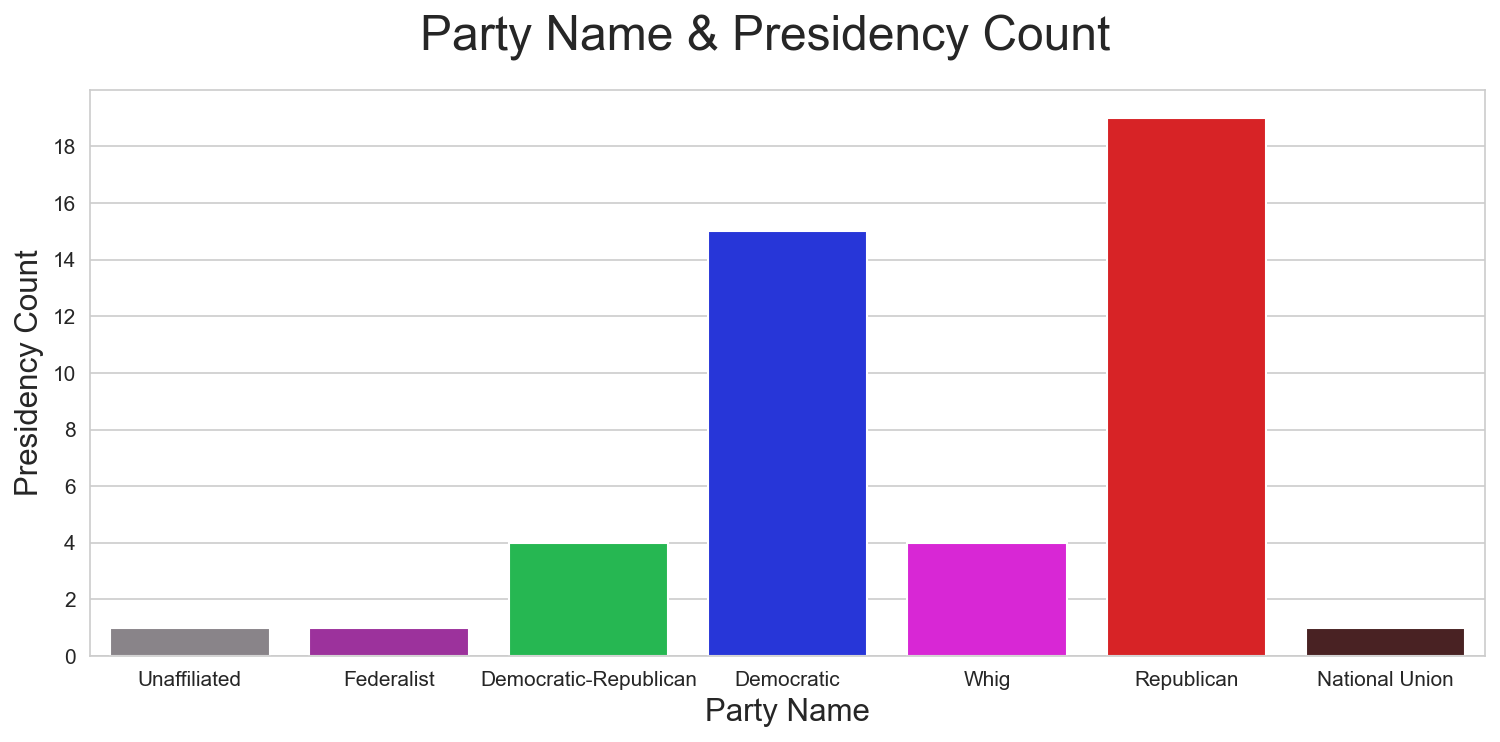

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5), dpi =150 )
splot =sns.countplot(data =pres, x="Party Name",
                     palette=['#8a838a',"#ad21ad","#0ecf48","#0a1df5","#f50af1","#f50509","#4f1c1d"])
plt.ylim((0,20));
plt.yticks(np.arange(0, 20, 2))
plt.suptitle("Party Name & Presidency Count",fontsize=23)
splot.set_xlabel("Party Name",fontsize=15)
splot.set_ylabel("Presidency Count",fontsize=15)
splot.tick_params(labelsize=10)

In [22]:
pres2= pres["Name(Birth–Death)"].str.split("(",expand=True)

In [23]:
pres= pres.join(pres2)

In [24]:
pres = pres.drop("Name(Birth–Death)", axis =1)

In [25]:
pres[1]= pres[1].apply(lambda title :title.split("(")[-1].replace(")",""))

In [26]:
pres.columns= ['POTUS No.','Party Name','Election','Vice President','From Date','To Date','Days in Office',"Name ",
              "Birth - Death"]

In [27]:
pres.head()

,POTUS No.,Party Name,Election,Vice President,From Date,To Date,Days in Office,Name,Birth - Death
0,1,Unaffiliated,1788–89,John Adams[c],"April 30, 1789","March 4, 1797",2865 days,George Washington,1732–1799
2,2,Federalist,1796,Thomas Jefferson[d],"March 4, 1797","March 4, 1801",1460 days,John Adams,1735–1826
3,3,Democratic-Republican,1800,Aaron Burr,"March 4, 1801","March 4, 1809",2922 days,Thomas Jefferson,1743–1826
5,4,Democratic-Republican,1808,George Clinton[e],"March 4, 1809","March 4, 1817",2922 days,James Madison,1751–1836
9,5,Democratic-Republican,1816,Daniel D. Tompkins,"March 4, 1817","March 4, 1825",2922 days,James Monroe,1758–1831


In [28]:
pres=pres[['POTUS No.', "Name ","Birth - Death",'Party Name','Election', 'Vice President',
             'From Date','To Date','Days in Office']]

In [29]:
pres["Days in Office"]=pres["Days in Office"].dt.days

**Grover Cleveland was 22nd and 24th POTUS,from March 4, 1885–March 4, 1889 (Term 1) and March 4, 1893-March 4, 1897 (Term 2)**

In [30]:
from datetime import datetime
date_format = "%B %d,%Y"
t1 = datetime.strptime("March 4, 1897", '%B %d, %Y')
t2 = datetime.strptime("March 4, 1893",'%B %d, %Y')
Term2 = t1-t2

In [31]:
Term2

datetime.timedelta(days=1461)

In [32]:
pres.loc[pres["POTUS No."]== "22","Days in Office"]=2922

In [33]:
pres.loc[pres["POTUS No."]== "22"]

,POTUS No.,Name,Birth - Death,Party Name,Election,Vice President,From Date,To Date,Days in Office
36,22,Grover Cleveland,1837–1908,Democratic,1884,Thomas A. Hendricks[e],"March 4, 1885","March 4, 1889",2922


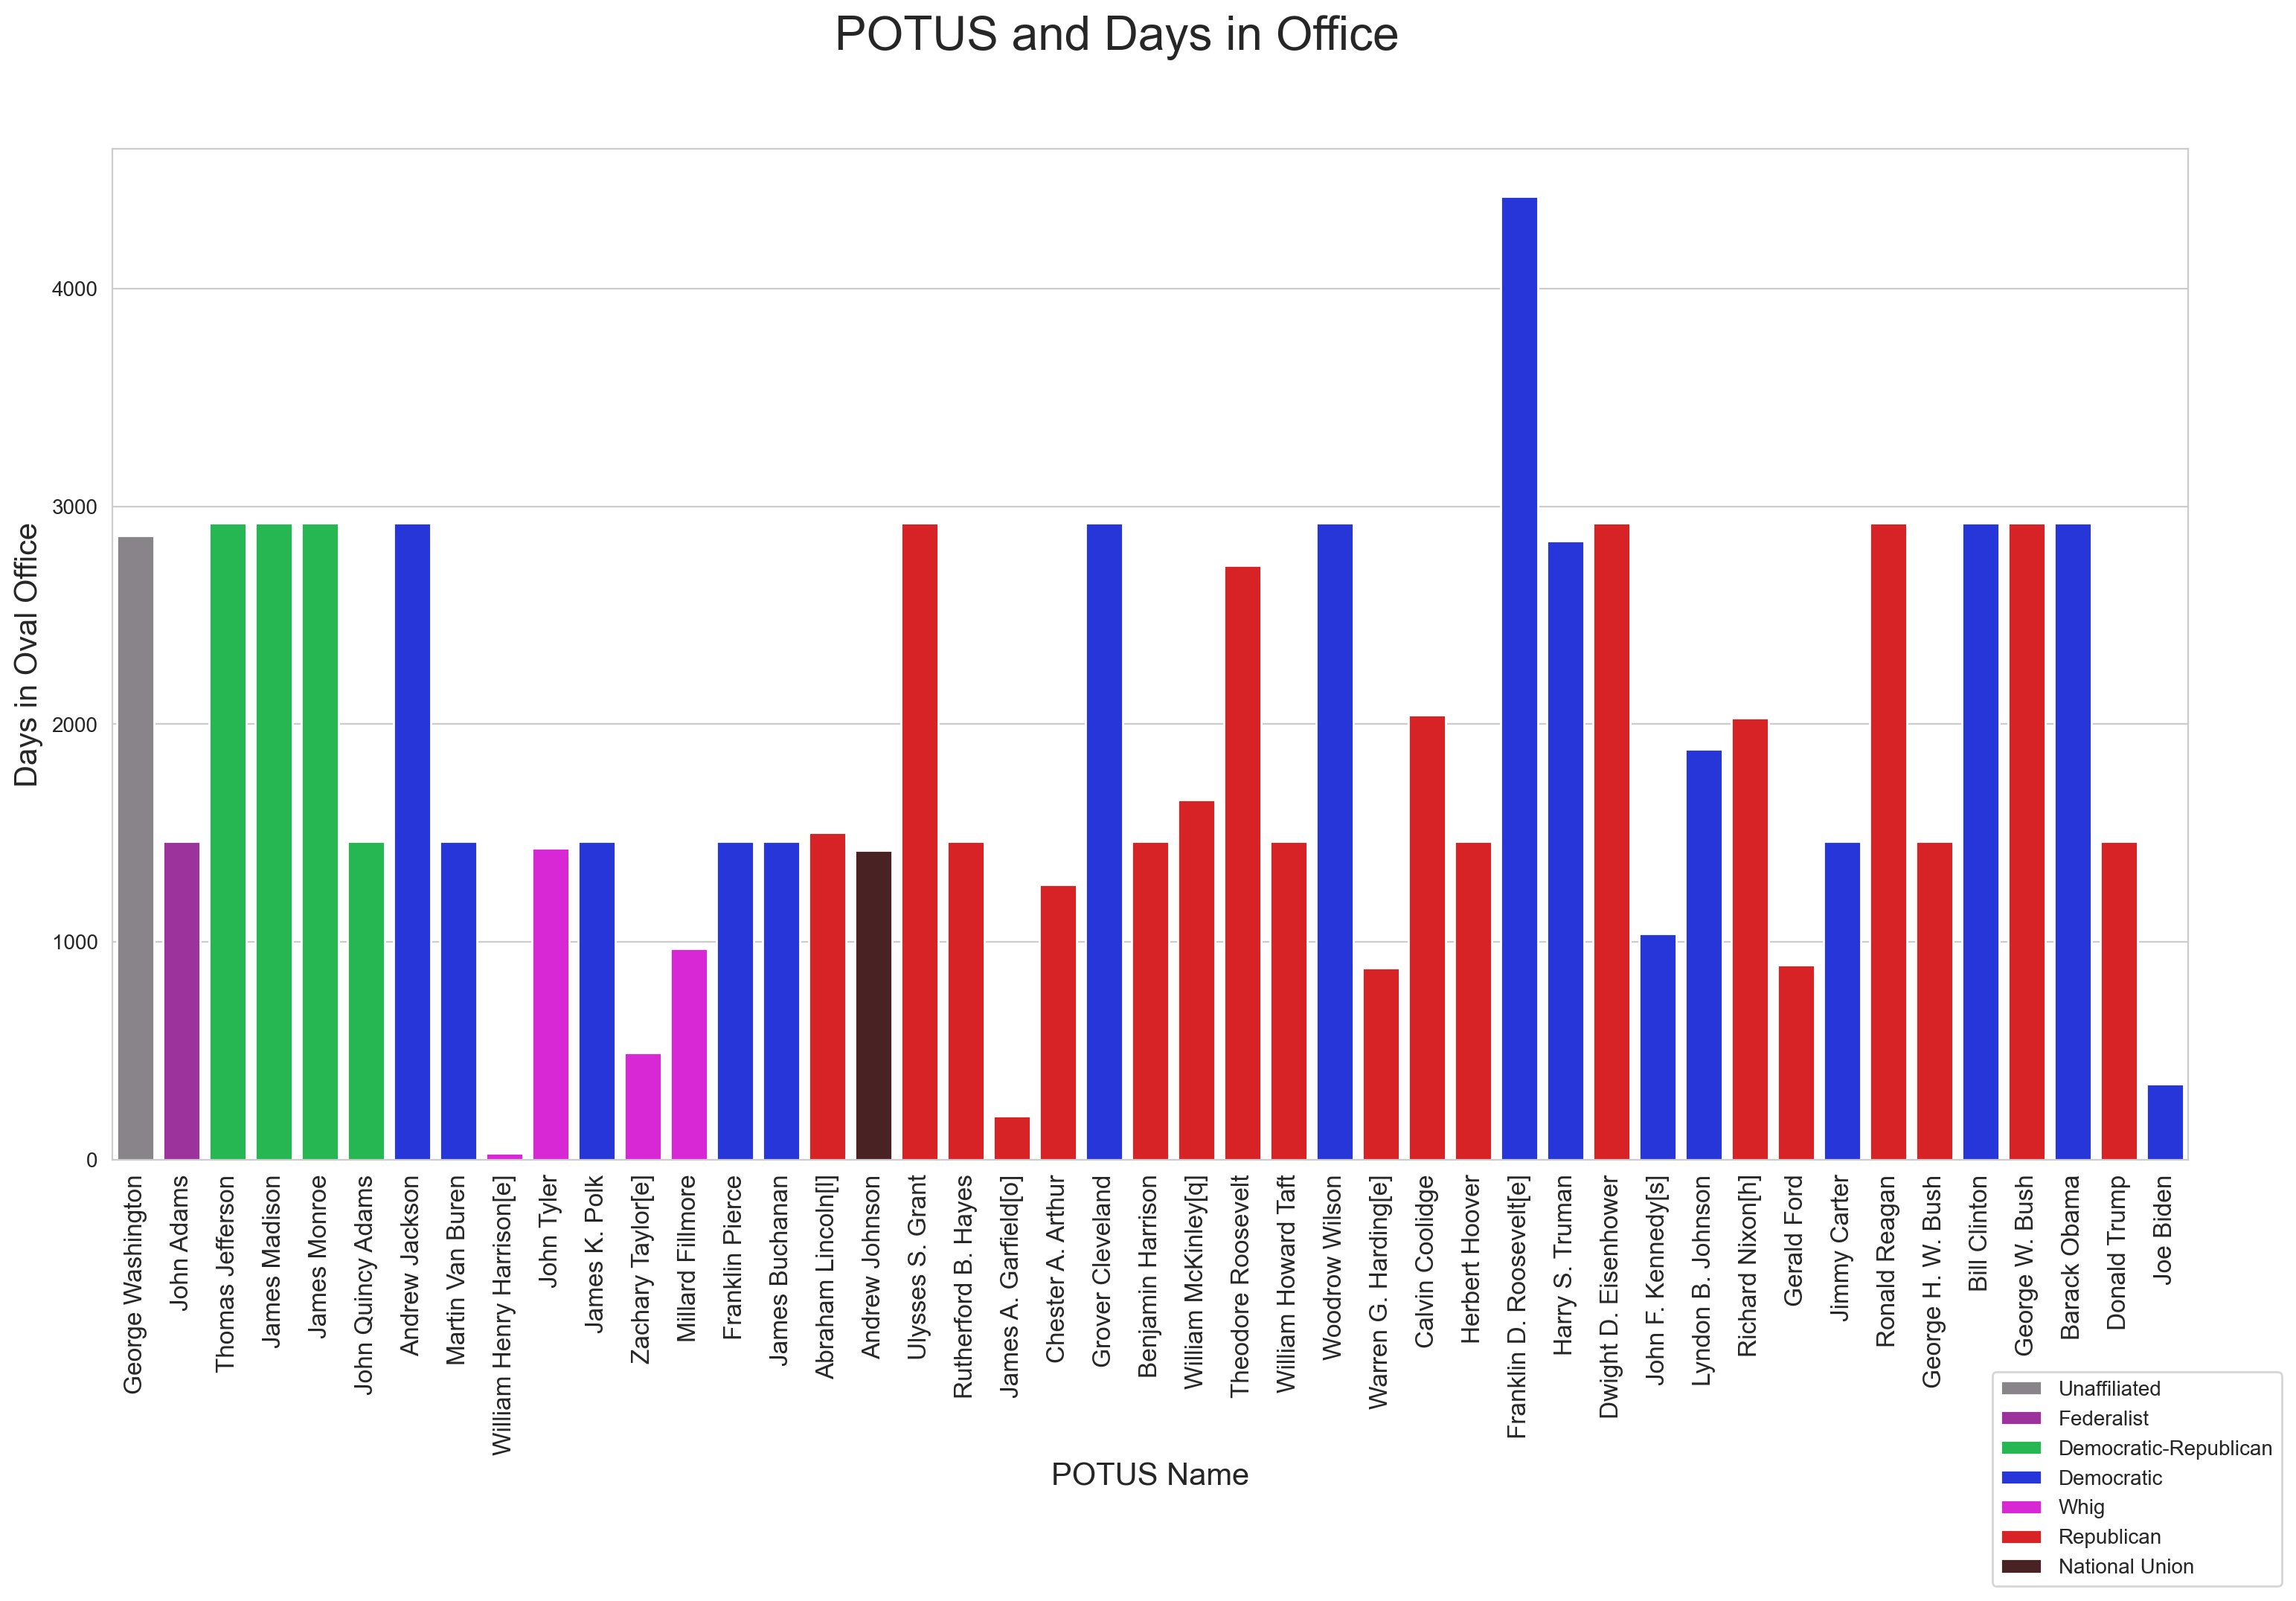

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,9), dpi =200)
splot2=sns.barplot(x = "Name ", y="Days in Office",data=pres,hue="Party Name",
            palette=['#8a838a',"#ad21ad","#0ecf48","#0a1df5","#f50af1","#f50509","#4f1c1d"],dodge=False)
splot2.set_xlabel("POTUS Name",fontsize=15)
plt.suptitle("POTUS and Days in Office",fontsize=23)
plt.legend(bbox_to_anchor=(1.05, -0.2), loc=0)
plt.xticks(rotation=90, fontsize=12)
splot2.set_ylabel("Days in Oval Office",fontsize=15);

In [35]:
pres.columns

Index(['POTUS No.', 'Name ', 'Birth - Death', 'Party Name', 'Election',
       'Vice President', 'From Date', 'To Date', 'Days in Office'],
      dtype='object')

## Presidents and State of Birth / State of Affilliation

### Presidents & State of Birth

source 2:https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_home_state

In [36]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [37]:
init_notebook_mode(connected=True) 

In [38]:
pres_birth= pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_home_state")[0].drop([45,46])

In [39]:
pres_birth.columns =['Date of birth', 'President', 'Birthplace', 'State of birth','In office']

In [40]:
pres_birth["State of birth"]=pres_birth["State of birth"].apply(lambda x:x.replace("†",""))

In [41]:
pres_birth["In office"][22] ="(22nd) March 4, 1885 – March 4, 1889"

In [42]:
pres_split =pres_birth["In office"].str.split(")", expand=True)
pres_split1=pres_split[1].str.split("–", expand=True)
pres_split2= pres_split[0].str.split("(",expand=True).drop(0,axis=1)
pres_birth =pres_birth.join(pres_split1)

In [43]:
pres_birth.columns=['Date of birth', 'President', 'Birthplace', 'State of birth',
       'In office', "Presidency Start", "Presidency End"]

### Age during Start of Presidency

In [44]:
pres_birth["Date of birth"][2]='April 13, 1743'

In [45]:
d1= pres_birth["Date of birth"].apply(pd.to_datetime)
d2= pres_birth["Presidency Start"].apply(pd.to_datetime)

In [46]:
pres_birth["Age at Presidency"]=(d2-d1)// np.timedelta64(1, 'Y')

In [47]:
pres_birth["Age at Presidency"]=np.round(pres_birth["Age at Presidency"],0)
pres_birth["Age at Presidency"]=pres_birth["Age at Presidency"].astype(int)

In [48]:
pres_birth.describe()

,Age at Presidency
count,45.000000
mean,55.511111
std,7.433408
min,42.000000
25%,51.000000
50%,55.000000
75%,60.000000
max,78.000000


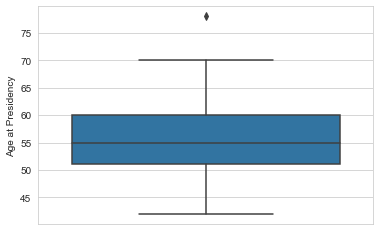

In [49]:
sns.boxplot(data=pres_birth,y="Age at Presidency");

### Maximum age of a POTUS during the start of Presidency

In [50]:
pres_birth[pres_birth["Age at Presidency"]==pres_birth["Age at Presidency"].max()]

,Date of birth,President,Birthplace,State of birth,In office,Presidency Start,Presidency End,Age at Presidency
40,"November 20, 1942",Joseph R. Biden,Scranton,Pennsylvania,"(46th) January 20, 2021 – present","January 20, 2021",present,78


### Minimum age of a POTUS during the start of Presidency

Using iloc method

In [51]:
pres_birth.iloc[pres_birth["Age at Presidency"].idxmin()]

Date of birth                                 October 27, 1858
President                                   Theodore Roosevelt
Birthplace                                           Manhattan
State of birth                                        New York
In office            (26th) September 14, 1901 – March 4, 1909
Presidency Start                           September 14, 1901 
Presidency End                                   March 4, 1909
Age at Presidency                                           42
Name: 26, dtype: object

In [52]:
pres_birth[pres_birth["President"]== "Barack Obama"]

,Date of birth,President,Birthplace,State of birth,In office,Presidency Start,Presidency End,Age at Presidency
44,"August 4, 1961",Barack Obama,Honolulu,Hawaii,"(44th) January 20, 2009 – January 20, 2017","January 20, 2009","January 20, 2017",47


### Top 5 Youngest POTUS by age at start of Presidency 

In [53]:
pres_birth.sort_values(by="Age at Presidency")[0:5]

,Date of birth,President,Birthplace,State of birth,In office,Presidency Start,Presidency End,Age at Presidency
26,"October 27, 1858",Theodore Roosevelt,Manhattan,New York,"(26th) September 14, 1901 – March 4, 1909","September 14, 1901","March 4, 1909",42
37,"May 29, 1917",John F. Kennedy,Brookline,Massachusetts,"(35th) January 20, 1961 – November 22, 1963","January 20, 1961","November 22, 1963",43
43,"August 19, 1946",Bill Clinton,Hope,Arkansas,"(42nd) January 20, 1993 – January 20, 2001","January 20, 1993","January 20, 2001",46
17,"April 27, 1822",Ulysses S. Grant,Point Pleasant,Ohio,"(18th) March 4, 1869 – March 4, 1877","March 4, 1869","March 4, 1877",46
22,"March 18, 1837",Grover Cleveland,Caldwell,New Jersey,"(22nd) March 4, 1885 – March 4, 1889","March 4, 1885","March 4, 1889",47


### Top 5 Oldest POTUS by age at start of Presidency 

In [54]:
pres_birth.sort_values(by="Age at Presidency",ascending=False)[0:5]

,Date of birth,President,Birthplace,State of birth,In office,Presidency Start,Presidency End,Age at Presidency
40,"November 20, 1942",Joseph R. Biden,Scranton,Pennsylvania,"(46th) January 20, 2021 – present","January 20, 2021",present,78
41,"June 14, 1946",Donald Trump,Queens,New York,"(45th) January 20, 2017 – January 20, 2021","January 20, 2017","January 20, 2021",70
34,"February 6, 1911",Ronald Reagan,Tampico,Illinois,"(40th) January 20, 1981 – January 20, 1989","January 20, 1981","January 20, 1989",69
7,"February 9, 1773",William Henry Harrison,Charles City County,Virginia,"(9th) March 4, 1841 – April 4, 1841","March 4, 1841","April 4, 1841",68
11,"April 23, 1791",James Buchanan,Cove Gap,Pennsylvania,"(15th) March 4, 1857 – March 4, 1861","March 4, 1857","March 4, 1861",65


## Presidents and their State of Birth

In [55]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [56]:
pres_birth['Code'] = pres_birth['State of birth'].map(code)

In [57]:
pres_birth['No of Presidents from the State']  = pres_birth['State of birth'].map(pres_birth['State of birth'].value_counts())

In [58]:
pres_birth["State of birth"].value_counts()

Virginia          8
Ohio              7
New York          5
Massachusetts     4
Texas             2
North Carolina    2
Vermont           2
Pennsylvania      2
Hawaii            1
Kentucky          1
Missouri          1
California        1
Connecticut       1
Georgia           1
New Hampshire     1
South Carolina    1
Arkansas          1
Illinois          1
New Jersey        1
Iowa              1
Nebraska          1
Name: State of birth, dtype: int64

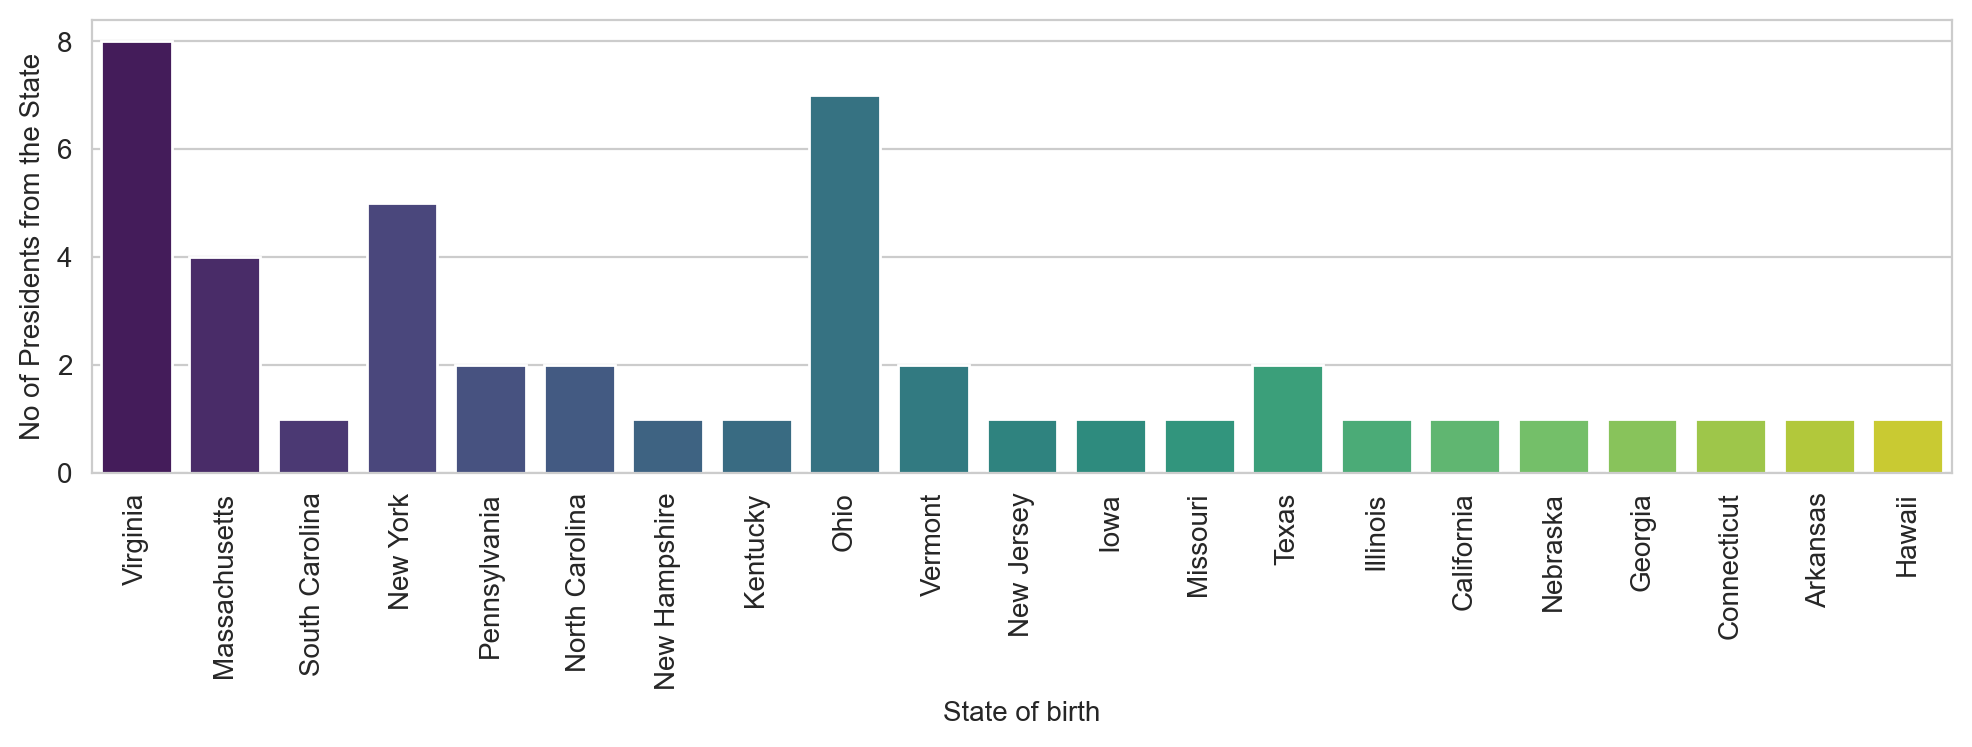

In [59]:
plt.figure(figsize=(12,3),dpi =200)
plt.tick_params(axis="x",labelrotation=90)
sns.barplot(data=pres_birth,x="State of birth",y= "No of Presidents from the State",palette="viridis");

In [60]:
data = dict(type='choropleth',
            colorscale = 'teal',
            locations = pres_birth['Code'],
            z = pres_birth['No of Presidents from the State'],
            locationmode = 'USA-states',
            text=pres_birth["State of birth"],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            
            ) 

layout = dict(title = 'Presidents and State of Birth',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [61]:
choromap = go.Figure(data = [data],layout = layout)

In [73]:
iplot(choromap)

In [63]:
pd.pivot_table(pres_birth, index = ["State of birth"],aggfunc="count", values= "President")

,President
State of birth,
Arkansas,1
California,1
Connecticut,1
Georgia,1
Hawaii,1
Illinois,1
Iowa,1
Kentucky,1
Massachusetts,4


In [64]:
pd.pivot_table(pres_birth, index = ["State of birth","President"],aggfunc="sum", values= "Age at Presidency")

,,Age at Presidency
State of birth,President,
Arkansas,Bill Clinton,46
California,Richard Nixon,56
Connecticut,George W. Bush,54
Georgia,Jimmy Carter,52
Hawaii,Barack Obama,47
Illinois,Ronald Reagan,69
Iowa,Herbert Hoover,54
Kentucky,Abraham Lincoln,52
Massachusetts,George H. W. Bush,64


### Presidents & States of Primary affiliation

In [65]:
pres_aff= pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_home_state")[2]

In [66]:
pres_aff["State"]=pres_aff["State"].str.split("[",expand=True).drop(1, axis=1)

In [67]:
pres_aff['Code'] = pres_aff['State'].map(code)

In [68]:
pres_aff['No of Presidents from the State'] = pres_aff['State'].map(pres_aff['State'].value_counts())

In [69]:
data2 = dict(type='choropleth',
            colorscale = 'viridis',
            locations = pres_aff['Code'],
            z = pres_aff['No of Presidents from the State'],
            locationmode = 'USA-states',
            text=pres_aff["State"],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            
            ) 

layout2 = dict(title = 'Presidents and State of Affiliation',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [70]:
choromap2 = go.Figure(data = [data2],layout = layout2)

In [71]:
iplot(choromap2)